In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob


sns.set_style('whitegrid')

In [2]:
metrics_files = glob.glob('**/**.json')
metrics_dicts = []

for file in metrics_files:
    with open(file, 'r') as f:
        if 'roberta' not in file:
            print(file)
            metrics_dicts.append(json.load(f))


rotten_tomatoes/run-metrics.json
sst2/run-metrics.json
ctweet/run-metrics.json
imdb/run-metrics.json
sarcasm/run-metrics.json


In [3]:
rt_dic = metrics_dicts[0]
sst_dic = metrics_dicts[1]
ct_dic = metrics_dicts[2]
imdb_dic = metrics_dicts[3]
sar_dic = metrics_dicts[4]

In [4]:
def scale_data(values):
    mn = min(values)
    mx = max(values)

    norm = mx - mn

    scaled_values = [(val - mn)/norm for val in values]
    return scaled_values

In [5]:
dicts = [rt_dic, sst_dic, ct_dic, imdb_dic, sar_dic]
dict_names = ['rt_dic', 'sst_dic', 'ct_dic', 'imdb_dic', 'sar_dic']

In [6]:
# fig, axs = plt.subplots(3, 2, figsize=(10, 8))
# for i, dic in enumerate(dicts):
#     ax = axs[i//2, i%2]
#     var_dic = dic['variance_metrics']
#     mod_dic = dic['modelling_metrics']
#     ax.plot(var_dic['subset_sizes'], var_dic['r2_values'], marker='o')
#     ax.plot(var_dic['subset_sizes'], mod_dic['test_accuracies'], marker='o')
#     ax.set_title(dict_names[i])
#     ax.set_xlabel('Subset Sizes')
#     ax.set_ylabel('R2 Values & Test accuracies')

# plt.tight_layout()
# plt.show()

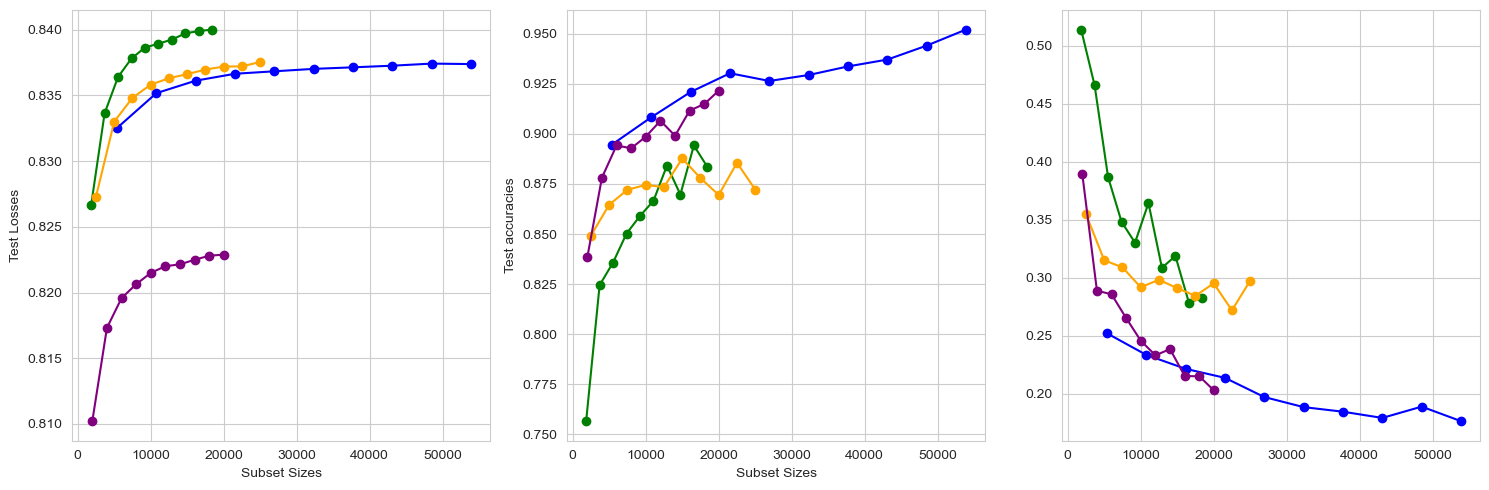

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
color = ["red", "blue", "green", "orange", "purple"]
for i, dic in enumerate(dicts):
    if i==0:
        continue
    var_dic = dic['variance_metrics']
    mod_dic = dic['modelling_metrics']
    axs[0].plot(var_dic['subset_sizes'], var_dic['r2_values'], marker="o", color=color[i])
    axs[1].plot(var_dic['subset_sizes'], mod_dic['test_accuracies'], marker="o", color=color[i])
    axs[2].plot(var_dic['subset_sizes'], mod_dic['test_losses'], marker="o", color=color[i])

axs[0].set_xlabel('Subset Sizes')
axs[0].set_ylabel('R2 Values')
axs[1].set_xlabel('Subset Sizes')
axs[1].set_ylabel('Test accuracies')
axs[0].set_xlabel('Subset Sizes')
axs[0].set_ylabel('Test Losses')

plt.tight_layout()
plt.show()

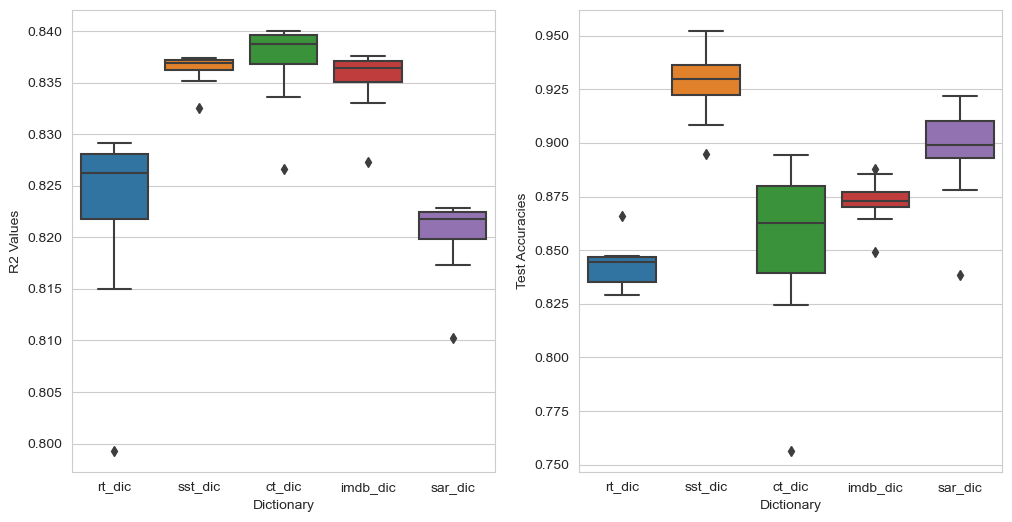

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

data1 = []
data2 = []
for dic, name in zip(dicts, dict_names):
    full_data_len = dic['variance_metrics']['subset_sizes'][-1]
    data1.extend([(name, val, full_data_len) for val in dic['variance_metrics']['r2_values']])
    data2.extend([(name, val, full_data_len) for val in dic['modelling_metrics']['test_accuracies']])
    # data.extend([(name, val*full_data_len) for val in dic['variance_metrics']['r2_values']])
df1 = pd.DataFrame(data1, columns=['Dictionary', 'R2 Values', 'Size'])
df2 = pd.DataFrame(data2, columns=['Dictionary', 'Test Accuracies', 'Size'])
sns.boxplot(x='Dictionary', y='R2 Values', data=df1, ax=axs[0])
sns.boxplot(x='Dictionary', y='Test Accuracies', data=df2, ax=axs[1])
plt.show()

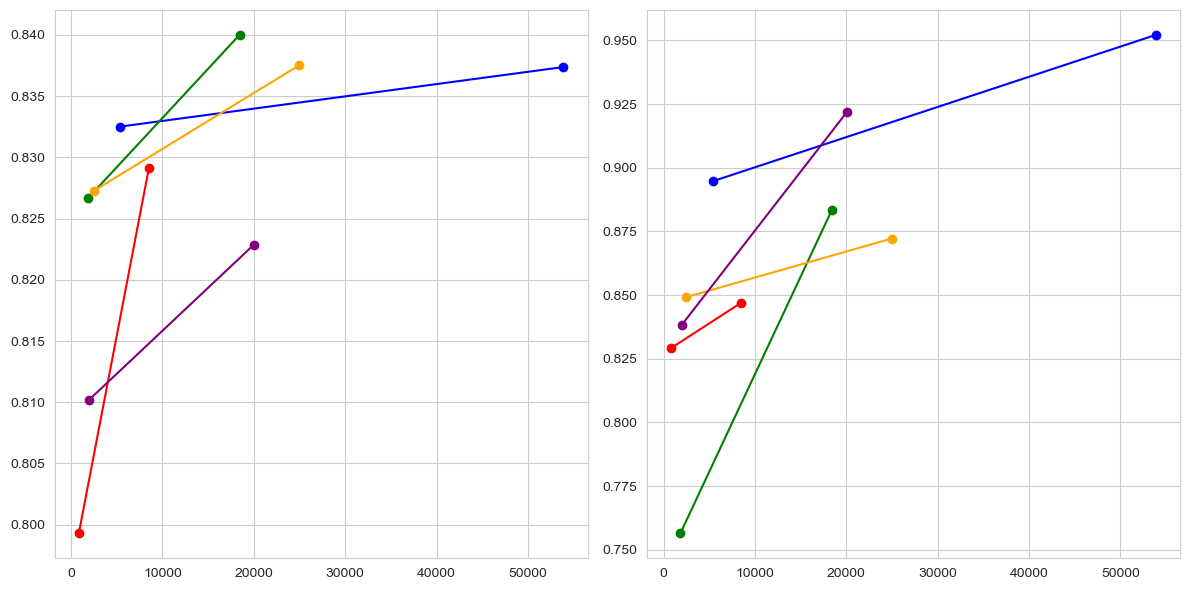

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i, dic in enumerate(dicts):
    var_dic = dic['variance_metrics']
    subset_sizes = [var_dic['subset_sizes'][0], var_dic['subset_sizes'][-1]]
    min_max_r2 = [var_dic['r2_values'][0], var_dic['r2_values'][-1]]

    mod_dic = dic['modelling_metrics']
    min_max_acc = [mod_dic['test_accuracies'][0], mod_dic['test_accuracies'][-1]]

    axs[0].plot(subset_sizes, min_max_r2, marker='o', color=color[i])
    axs[1].plot(subset_sizes, min_max_acc, marker='o', color=color[i])
plt.tight_layout()
plt.show()

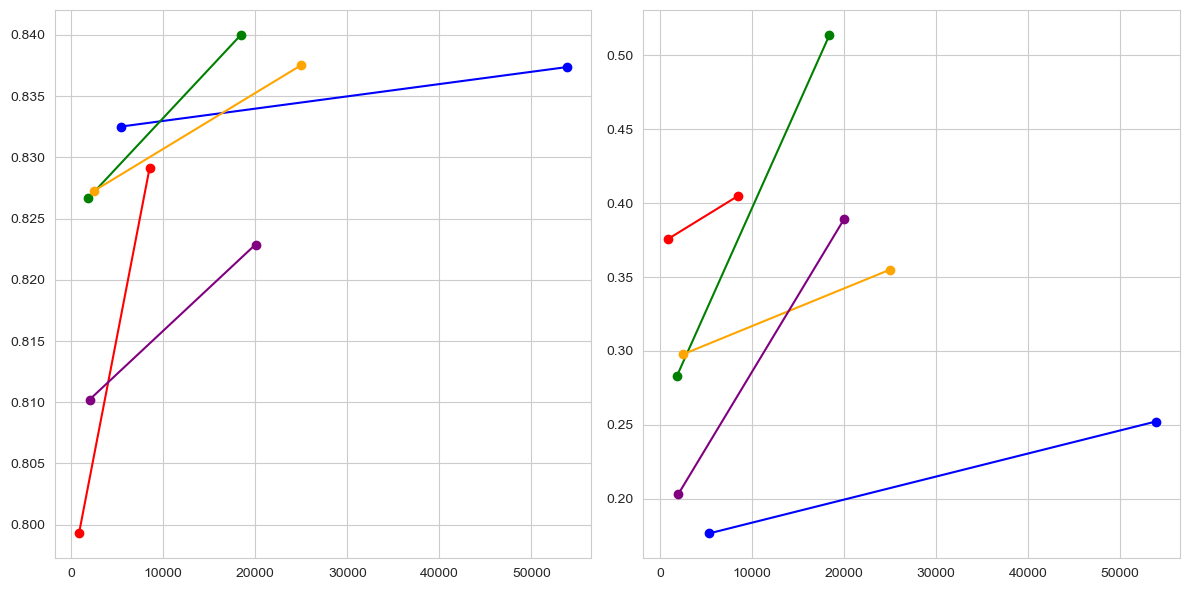

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i, dic in enumerate(dicts):
    var_dic = dic['variance_metrics']
    subset_sizes = [var_dic['subset_sizes'][0], var_dic['subset_sizes'][-1]]
    min_max_r2 = [var_dic['r2_values'][0], var_dic['r2_values'][-1]]

    mod_dic = dic['modelling_metrics']
    min_max_acc = [mod_dic['test_losses'][-1], mod_dic['test_losses'][0]]

    axs[0].plot(subset_sizes, min_max_r2, marker='o', color=color[i])
    axs[1].plot(subset_sizes, min_max_acc, marker='o', color=color[i])
plt.tight_layout()
plt.show()